# Hacking the Humanities Week 4: Authorship Attribution

One of the most interesting applications of distant reading techniques is authorship attribution. In this final week of *Hacking the Humanities*, you are going to learn about one of the most common and useful techniques for identifying the author of an anonymous text: [Burrows' Delta](https://doi.org/10.1093/llc/17.3.267).

In this notebook, you are going to build the basic functionality for calculating Burrows' Delta, so that you can see how the technique works. In the final section of the notebook, I will show you how to use 'vectorised' functions in order to apply Burrows Delta in a more efficient way, which takes advantage of your computer's internal structure.

For this notebook, I have pre-prepared you a corpus of 22 novels. For one of them *Waverley*, we do not know the author! You are going to use Burrows' Delta to try and work out who wrote this novel, which was published anonymously in 1814.

## Section 1: Euclidean distance

In order to work out if two or more texts were written by the same person, we need to be able to compare them stylistically. Burrows' Delta is a simple and intuitive way of doing this. First you calculate the word frequencies for the texts in your corpus, then you use an appropriate 'distance metric' to see which texts are closer to one another in their use of words.

The 'euclidean distance' is a generalisation of Pythagoras' theorem. It is calculated using the following formula:

$$\delta_{< t_0,t_1 >} = \sqrt{(w_{< t_0>}^0 - w_{< t_1>}^0)^2 + (w_{< t_0>}^1 - w_{< t_1>}^1)^2 + \ldots + (w_{< t_0>}^n - w_{< t_1>}^n)^2}$$

Let's break this down:
* $\delta_{< t_0,t_1 >}$ : the distance ("delta") between text 0 ($_{< t_0>}$) and text 1 ($_{< t_1 >}$)
* $w_{< t_0>}^0$ : the relative frequency of word 0 ($w^0$) in text 0 ($_{< t_0>}$). E.g. if word 0 is 'the', then the frequency of this word in text 0 might be $20$ per 1000.
* $w_{< t_0>}^n - w_{< t_1>}^n$ : consider just word $n$ ($w^n$). What is the difference in the frequency of this word in text 0 and text 1? To find out, subtract the frequency in text one from the frequency of the word in text zero. For example, if 'the' is used 20 times per 1000 in text 0, and 12 times per thousand in text 1, then the difference would be $20 - 12 = 8$.
* $(w_{< t_0>}^n - w_{< t_1>}^n)^2$ : once you have taken the difference, square it (i.e. raise it to the power of two). If the difference between the frequencies of word $n$ was $8$, then the 'squared difference' would be $8^2 = 64$.
* $\sqrt{(w_{< t_0>}^0 - w_{< t_1>}^0)^2 + (w_{< t_0>}^1 - w_{< t_1>}^1)^2 + \ldots + (w_{< t_0>}^n - w_{< t_1>}^n)^2}$ : once you have squared all the differences, add them together and take the square root of the total

If we know the relative frequencies of the words in two texts, we can use this formula to calculate the Euclidean distance between them, as shown in the explainer video. The formula is broken down in practical terms in the assignment below.

But before you get to the assignment, let's run over some of the tools you will need to implement the formula.

You already know how to add and subtract:

In [1]:
x = 7
y = 12

print(x - y)
print(x + y)

-5
19


If you want to add lots of numbers together, a really useful trick is the `+=` operator. This works a little bit like `=`, but instead of *replacing* the value of your variable, it adds to it:

In [2]:
print("Here is x before we use '+=':")
print(x)

print("\nAnd here it is after we use '+='")
x += 10
print(x)

Here is x before we use '+=':
7

And here it is after we use '+='
17


One common way to apply this operator is to loop over a list, and then use it to add to the total...

In [3]:
my_numbers = [10, 12, 8, 20]
total = 0
for number in my_numbers:
    total += number
    print(f"After this iteration, total == {total}")

After this iteration, total == 10
After this iteration, total == 22
After this iteration, total == 30
After this iteration, total == 50


To raise a number to a power, you use `**`. This can also be used to take a root. If you think back to high school, you might remember that $\sqrt{x}$ means the same as $x^\frac{1}{2}$. Similarly, $\sqrt[3]{x}$ means the same as $x^\frac{1}{3}$, $\sqrt[4]{x}$ means the same as $x^\frac{1}{4}$, and so on.

Execute the cell below to see how you can square a number *and* take the square root using `**`:

In [4]:
z = 9

print("Here is z squared:")
print(z ** 2)

print("\nAnd here is the square root of z:")
print(z ** 0.5)

Here is z squared:
81

And here is the square root of z:
3.0


You can also write 0.5 as a fraction, but remember the parentheses!

In [5]:
print("Here is the square root of z another way:")
print(z ** (1/2))

Here is the square root of z another way:
3.0


In the code below, I provide the skelton of the function for you. All you need to do is put in the maths, using the operators we have covered in this section (`-`, `+=`, `**`). But there is one part of the code that will make more sense to you if you have a little chance to see it in action. It is the `zip()` function, which lets you loop over *two or more* lists at the same time. This is very useful for our function in this case, because you have two lists of word frequencies, and need to minus one from the other. Execute the cell below to see how `zip()` works.

In [6]:
list_one = [10, 20, 30]
list_two = [3, 5, 7]
list_one_minus_list_two = []

for number_one, number_two in zip(list_one, list_two):

    print(f"On this iteration, number_one == {number_one} and number_two == {number_two}")

    list_one_minus_list_two.append(number_one - number_two)

print(f"List one minus list two: {list_one_minus_list_two}")

On this iteration, number_one == 10 and number_two == 3
On this iteration, number_one == 20 and number_two == 5
On this iteration, number_one == 30 and number_two == 7
List one minus list two: [7, 15, 23]


## Assignment 4.1: Write a function to calculate the Euclidean distance

Now you know the formula, and you have all the tools you need to implement it. To apply the formula, you need to perform four steps in the function below:

1. **Take the difference between the word frequencies in novel_1 and novel_2:** Assume that each novel is a list of word frequencies, that that these word frequencies are in the same order (e.g. if the 7th number in the first list is the frequency of 'with', then the 7th number in the second list is also 'with'). I have 'zipped' the two lists together for you. All you need to do is minus one number from the other, and append the result to the list of `differences`.
2. **Square the differences:** Now you have a list of `differences`, you need to loop over them, and square each one. Remember, 'squaring' a number means raising it to the power of 2. Append the result to the list of `squares`.
3. **Sum the squares:** Now you have a list of `squares`, you need to add them all together. Loop over the list, and use the "`+=`" trick we saw above to add each squared difference to the `total`.
4. **Take the square root of the total:** Now you have added all the squared differences together, your final task is to take the square root of the total. The total is just one number, so you *don't* need a `for`-loop for this. Just raise the total to the power of `0.5`, and save the result in a variable called `distance`.

Good luck!

In [7]:
def calculate_euclidean_distance(novel_1, novel_2):
    """Calculates the Euclidean distance between novel_1 and novel_2.

    Parameters:
    ===========
    novel_1: a list of word frequencies for one novel
    novel_2: a corresponding list of word frequencies for another novel"""

    # First go through each pair of word frequencies, and take the difference.
    # (Remember, 'difference' is the same as subtraction!)
    differences = []
    for number_1,number_2 in zip(novel_1, novel_2):
        ### BEGIN SOLUTION
        differences.append(number_1 - number_2)
        ### END SOLUTION

    # Now you have a list of differences, go through the list and square each one.
    squares = []
    for difference in differences:
        ### BEGIN SOLUTION
        squares.append(difference**2)
        ### END SOLUTION

    # Now you have a list of squared differences, add them all together.
    total = 0
    for square in squares:
        ### BEGIN SOLUTION
        total += square
        ### END SOLUTION

    # Take the square root of the total and save it in a temporary
    # variable called 'distance'

    ### BEGIN SOLUTION
    distance = total**0.5
    ### END SOLUTION

    return distance

The cell below imports word frequencies for the 20 most common words in Fergus Hume's *Mystery of the Hansom Cab* and Catherine Martin's *An Australian Girl*, and tests your function on them.

The words are 'and', 'as', 'but', 'for', 'had', 'he', 'her', 'his', 'in', 'is', 'it', 'of', 'on', 'she', 'that', 'the', 'to', 'was', 'with' and 'you'—in that order.

In [8]:
cab_frequencies = [
    29.88870509,  9.38523345,  6.14428952,  6.51564768,  7.12332467,
    19.09681195,  8.87883596, 12.08602005, 17.14999494,  6.27932885,
    11.10698491, 24.20579994,  7.53969594,  8.75504991, 11.56836929,
    56.93033096, 25.10606214, 14.53923455,  8.75504991, 10.4092817
]
girl_frequencies = [
    27.12960286,  7.78510789,  7.75356796,  7.16482246,  7.36983205,
    8.3370568 , 11.82747654,  4.91497359, 17.57825847,  8.04268405,
    11.50682051, 29.13238889,  6.94929955, 11.57515704, 14.93941704,
    46.03779536, 26.10455489, 10.83396851,  9.54083108, 15.96972166
]

euc_dist = calculate_euclidean_distance(cab_frequencies, girl_frequencies)
print(f'The euclidean between the two novels is: {euc_dist}')
### BEGIN HIDDEN TESTS
from random import random

test_one = [random() for _ in range(5)]
test_two = [random() for _ in range(5)]

def test_func(novel_1, novel_2):
    total = 0
    for number_1,number_2 in zip(novel_1, novel_2):
        total += (number_1 - number_2)**2
    return total**0.5

assert test_func(test_one, test_two) == calculate_euclidean_distance(test_one, test_two)

### END HIDDEN TESTS

The euclidean between the two novels is: 20.035830687604285


Expected output:
```
The euclidean between the two novels is: 20.035830687604285
```

### Extension 4.2: Write a function to calculate the Manhattan distance

In the lecture, we saw a couple of other distance metrics. Another one is the Manhattan difference. This one is similar to the Euclidean distance, but a bit simpler. The formula is:

$$\delta_{< t_0,t_1 >} = |(w_{< t_0>}^0 - w_{< t_1>}^0) + (w_{< t_0>}^1 - w_{< t_1>}^1) + \ldots + (w_{< t_0>}^n - w_{< t_1>}^n)|$$

If you want, you can attempt this extension activity, and try to write a function that will calculate the Manhattan distance between two texts.

To calculate this one, there are only three steps:

1. **Take the differences between the word frequencies:** For each word, take the difference in frequencies between the two texts ($(w_{< t_0>}^0 - w_{< t_1>}^0)$). Unlike for Euclidean distance, you *don't* need to square the differences.
2. **Sum the differences:** Add up all the differences ($d_{w^1} + d_{w^2} + \ldots + d_{w^n}$).
3. **Take the absolute value:** Finally, after you have added up all the differences, take the abosolute value ($|total|$). This ensures that the distance is always a positive number. To take the absolute value, you can use the `abs()` function, which is built in to Python.

In [9]:
def calculate_manhattan_distance(novel_1, novel_2):
    """Calculates the Manhattan distance between novel_1 and novel_2.

    Parameters:
    ===========
    novel_1: a list of word frequencies for one novel
    novel_2: a corresponding list of word frequencies for another novel"""

    # First go through each pair of word frequencies, and take the difference.
    # (Remember, 'difference' is the same as subtraction!)
    differences = []
    for number_1,number_2 in zip(novel_1, novel_2):
        # YOUR CODE HERE (replace the 'pass')
        pass
        # END OF YOUR CODE

    # Now take the total of the differences
    total = 0
    for difference in differences:
        # YOUR CODE HERE (replace the 'pass')
        pass
        # END OF YOUR CODE

    # Now take the absolute value of the total, and return it to the user.
    # NB: This time, I have not provided the return statement for you—you need to do that part.
    # YOUR CODE HERE


    # END OF YOUR CODE

In [10]:
# Test your code using this cell
man_dist = calculate_manhattan_distance(cab_frequencies, girl_frequencies)
print(f'The Manhattan between the two novels is: {man_dist}')

The Manhattan between the two novels is: None


Expected output:
```
The Manhattan between the two novels is: 10.970714209999993
```

## Section 2: Preparing your data matrix

Now you know how to compare two novels, it's time to get serious.

In the `corpus` folder for this week are 21 novels. 20 of them are unmysterious, but there is one, *Waverley*, whose author we do not know.

In this section, you are going to use the `CountVectorizer` object from the `sklearn` package to convert the corpus into a data matrix. A matrix is just a square of numbers. Here is a $3 \times 4$ matrix:
$$
\begin{matrix}
  7 & 12 & 84 & 9 \\
  91 & 5 & 12 & 54 \\
  24 & 77 & 6 & 82
 \end{matrix}
$$
It is a $3 \times 4$ because it has $3$ rows and $4$ columns. In this section, you will create such a matrix to hold all of your data. You have $21$ novels, and you are going to collect information on the $300$ most common words in them. Each row of your matrix will represent one novel, and each column will represent the counts for a particular word. Your matrix, therefore, will be a $21 \times 300$ matrix.

Before you can do any of this, you are going to need a corpus. I have taken care of this for you this week. Execute the cell below to import all the novels.

In [11]:
from helper_functions import import_corpus
corpus = import_corpus()

The Absentee, by Maria Edgeworth successfully imported.


An Australian Girl, by Catherine Martin successfully imported.


Belinda, by Maria Edgeworth successfully imported.


The Blithdale Romance, by Nathaniel Hawthorne successfully imported.


The Crimson Cryptogram, by Fergus Hume successfully imported.


The Disappearing Eye, by Fergus Hume successfully imported.


The Mystery of the Hansom Cab, by Fergus Hume successfully imported.


The Hungry Stones, and Other Stories, by Rabindranath Tagore successfully imported.


Ivanhoe, by Sir Walter Scott successfully imported.


The Bride of Lammermoor, by Sir Walter Scott successfully imported.


The Lost Parchment, by Fergus Hume successfully imported.


Mashi, and Other Stories, by Rabindranath Tagore successfully imported.


The Heart of Mid-Lothian, by Sir Walter Scott successfully imported.


Old Mortality, by Sir Walter Scott successfully imported.


Castle Rackrent, by Maria Edgeworth successfully imported.


Rob Roy, by Sir Walter Scott successfully imported.


The Scarlet Letter, by Nathaniel Hawthorne successfully imported.


The House of the Seven Gables, by Nathaniel Hawthorne successfully imported.


The Talisman, by Sir Walter Scott successfully imported.


Waverley; or, 'tis Sixty Years Since, by ??? successfully imported.


Wyllard's Weird, by Mary Braddon successfully imported.

21 novels imported, by 8 unique authors.


```
Waverley; or, 'tis Sixty Years Since, by ??? successfully imported.
```
Who could it be?

This corpus is structured in just the way we learnt about in Week 3. The corpus as a whole is a `list`, and each novel in it is represented by a `dict`. But this week we have more information available. Have a play with the cell below to see what information you can extract from the corpus.

In [12]:
print(f"We have the following information about each novel: {list(corpus[0])}\n")

# the author of novel 3:
print("The title of novel 3: " + corpus[3]["author"] + "\n")

# the 'body' is the preprocessed text, in lower case, with all punctuation and digits removed
print("The body of novel 3: " + corpus[3]["body"][1000:1500] + "\n")

# the 'tokens' is the tokenised text, tokenised in this case using word_tokenise from the nltk package:
print(corpus[3]["tokens"][100:110])

We have the following information about each novel: ['title', 'author', 'header', 'licence', 'body', 'tokens']

The title of novel 3: Nathaniel Hawthorne

The body of novel 3: treet mr coverdale said he softly can i speak with you a moment as i have casually alluded to the veiled lady it may not be amiss to mention for the benefit of such of my readers as are unacquainted with her now forgotten celebrity that she was a phenomenon in the mesmeric line one of the earliest that had indicated the birth of a new science or the revival of an old humbug since those times her sisterhood have grown too numerous to attract much individual notice nor in fact has any one of them 

['xxii', 'fauntleroy', 'xxiii', 'a', 'village', 'hall', 'xxiv', 'the', 'masqueraders', 'xxv']


### Assignment 4.3: Create, fit and deploy your CountVectorizer

For this assignment, you are going to apply a `CountVectorizer` instance to your corpus. Execute the cell below to import the necessary functions, and to extract the body text from each novel in preparation for the task.

In [13]:
# Import the CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import numpy as np # We will need this later, for working with numpy arrays

# Extract the body text from each novel
# (In this case, I use a 'list comprehension', a special shorthand for a for-loop)
body_texts = [novel["body"] for novel in corpus]

Now in the cell below, you need to create a data matrix from your corpus.

Your task:
1. **Create a vectorizer:** Create a vectorizer using `CountVectorizer()`, and call it `vectorizer`. Set your vectorizer to extract the 300 most common words using the `max_features` parameter. Set the tokenizer to be `word_tokenize` using the `tokenizer` parameter. (**NB:** You will get a `UserWarning`, but this is nothing to worry about.)
2. **Fit it to your corpus:** Use the `.fit()` method of your vectorizer on the `body_texts` variable provided. Your vectorizer will look at all 21 novels and work out what the 300 most common words are.
3. **Use it to transform your corpus into a matrix:** Use the `.transform()` method on your list of `body_texts` to create a new data matrix. Save the matrix in a variable called `data_matrix`

At the end of the cell, you will see that I have added an extra line of code, which converts your `data_matrix` into the type `np.array`. This will make the matrix easier to work with.

In [14]:
### BEGIN SOLUTION
vectorizer = CountVectorizer(max_features=300, tokenizer=word_tokenize)
vectorizer.fit(body_texts)
data_matrix = vectorizer.transform(body_texts)
### END SOLUTION
data_matrix = data_matrix.toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [15]:
print(f"First ten columns: {vectorizer.get_feature_names()[:10]}\n")
for i in range(len(corpus)):
    title = corpus[i]["title"]
    data = data_matrix[i,0:10]
    print(f"{title[:30]:<30} : {data}")

### BEGIN HIDDEN TESTS
assert data_matrix.shape == (21,300)
test_vec = CountVectorizer(max_features=300, tokenizer=word_tokenize)
test_vec.fit([novel["body"] for novel in corpus])
test_matrix = test_vec.transform([novel["body"] for novel in corpus]).toarray()
assert np.all(test_matrix == data_matrix)
### END HIDDEN TESTS

First ten columns: ['a', 'about', 'after', 'again', 'against', 'all', 'also', 'always', 'am', 'among']

The Absentee                   : [1830  135  119   91   35  611    5   70  206   33]
An Australian Girl             : [4721  301  379  129   95  974   38  191  237   77]
Belinda                        : [3208  211  208  111   63  848   15  129  593    5]
The Blithdale Romance          : [2095   99   99   78   37  322    7   33   48   88]
The Crimson Cryptogram         : [1230  175  126   27   29  217   42   31  150    0]
The Disappearing Eye           : [1940  232  150  123   19  322   80   72  178    0]
The Mystery of the Hansom Cab  : [2175  234  161   69   45  319   28   29   86   13]
The Hungry Stones, and Other S : [1056   85   79   63   14  264   32   24   86   14]
Ivanhoe                        : [3725  101  147  108  151  407   95   15  193  110]
The Bride of Lammermoor        : [2639  117  117   61   93  338   36   33  167   33]
The Lost Parchment             : [1583  244  1

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Expected output:

You will get this error, which you can ignore:
```
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
```
Then you should see this:
```
First ten columns: ['a', 'about', 'after', 'again', 'against', 'all', 'also', 'always', 'am', 'among']

The Absentee                   : [1830  135  119   91   35  611    5   70  206   33]
An Australian Girl             : [4721  301  379  129   95  974   38  191  237   77]
Belinda                        : [3208  211  208  111   63  848   15  129  593    5]
The Blithdale Romance          : [2095   99   99   78   37  322    7   33   48   88]
The Crimson Cryptogram         : [1230  175  126   27   29  217   42   31  150    0]
The Disappearing Eye           : [1940  232  150  123   19  322   80   72  178    0]
The Mystery of the Hansom Cab  : [2175  234  161   69   45  319   28   29   86   13]
The Hungry Stones, and Other S : [1056   85   79   63   14  264   32   24   86   14]
Ivanhoe                        : [3725  101  147  108  151  407   95   15  193  110]
The Bride of Lammermoor        : [2639  117  117   61   93  338   36   33  167   33]
The Lost Parchment             : [1583  244  158   84   48  305   37   63  199   20]
Mashi, and Other Stories       : [838  77  71  41  21 157  21  10  33   7]
The Heart of Mid-Lothian       : [5047  316  270  179  184  595   81   64  285  109]
Old Mortality                  : [3630  209  159  110  138  398   67   31  212  101]
Castle Rackrent                : [980  81 103  29  48 386  27  31  20  11]
Rob Roy                        : [4223  243  185  127  128  499  101   48  250   74]
The Scarlet Letter             : [2103   89   94   69   37  375   15   35   34   63]
The House of the Seven Gables  : [2823  143  132   79   40  374   20   49   58   68]
The Talisman                   : [2427   61  107   88   89  269   63   10  107   56]
Waverley; or, 'tis Sixty Years : [4788  210  260  101  108  519  120   67  183  138]
Wyllard's Weird                : [4338  295  293  102   88  684   18  121  265   66]
```

## Section 3: Improving your data matrix

The `CountVectorizer` class is extremely useful, but it has a flaw: it only gives you the raw counts for each word, rather than the relative freqencies. If you look above, you will see that the word 'a' is used more than 4,000 times in *Wyllard's Weird*. But as we know, this number is pretty meaningless unless you know how long that novel is!

In this section, you are going to improve your data matrix. Not only are you going to calculate the *relative* frequencies for each type in the corpus, but you are also going to perform *mean normalisation* to improve the accuracy of your results, as described in the explainer videos.

### An introduction to broadcasting

In order to improve our data matrix, we are going to need to convert all the numbers to relative frequencies, and then convert them to *z*-scores. To do this effectively, we are going to use a trick in `numpy` called [broadcasting](https://numpy.org/doc/1.18/user/basics.broadcasting.html). Basically, when numpy sees that your data matrix has 21 rows and 300 columns, and that you have 21 word counts, it will work out that you want to apply those 21 word consistently to each of the 21 rows. As I showed you in the explainer video, we need to use `np.reshape()` to make this broadcasting work. I have provided the relevant line of code for you, so you don't need to worry about it.

Go through the cells below to get a sense of how broadcasting works. **If you don't understand, don't worry, you will still be able to complete all the assignments using the code given in the lectures.** For the time being, you can treat numpy's ability to do the maths correctly as 'magic', and try and understand it later if you want to. I have provided any additional code needed to ensure that the 'broadcasting' will work whether you fully grasp it or not.

If you would like to try and get the hang of broadcasting, you can go through the cells below.

The first cell creates a numpy array with 2 rows and 4 columns:

In [16]:
my_array = np.array([[1,1,1,1],[2,2,2,2]])
print(my_array)

[[1 1 1 1]
 [2 2 2 2]]


If you ever want to know how many rows and columns an array has, you can use the 'shape' attribute:

In [17]:
print(f'The shape of my_array is {my_array.shape}')

The shape of my_array is (2, 4)


You can do this with your `data_matrix` too, if you want to check that everything is as expected:

In [18]:
data_matrix.shape

(21, 300)

This should have given you this output:
```
(21,300)
```
We have 21 novels in our corpus, and we have collected data on 300 words. That means 21 rows and 300 columns.

Now execute the cell below to see an example of 'broadcasting'. Remember `my_array` from just above? It has 2 rows and 4 columns. Now imagine I wanted to divide the first row by 2, and divide the second row by 7. This is how I could do it. First create a new array with 2 rows and 1 column:

In [19]:
new_array = np.array([[2],[7]])
print(new_array)
print(f'The shape of new_array is {new_array.shape}')

[[2]
 [7]]
The shape of new_array is (2, 1)


The shape of `new_array` is `(2,1)`, and the shape of `my_array` is `(2,4)`. Since the number of rows is the same, numpy knows exactly what I want to do in this cell:

In [20]:
divided_array = my_array / new_array
print(divided_array)

[[0.5        0.5        0.5        0.5       ]
 [0.28571429 0.28571429 0.28571429 0.28571429]]


Numpy has done exactly what I wanted! The first row has been divided by 2 and the second row has been divided by 7. I could also do it the other way. What if I wanted to add 1 to the first column, 2 to the second column, 3 to the third column, and 4 to the fourth column. Let's create another array:

In [21]:
column_array = np.array([[1,2,3,4]])
print(column_array)
print(f'The shape of column_array is {column_array.shape}')
print(f'In case you have forgotten, the shape of my_array is {my_array.shape}')

[[1 2 3 4]]
The shape of column_array is (1, 4)
In case you have forgotten, the shape of my_array is (2, 4)


Now `my_array` and `column_array` have the same number of *columns*. They both have 4 columns. So if I add `my_array` and `column_array` together, it knows that I want to line up the columns rather than the rows:

In [22]:
summed_array = my_array + column_array
print(f'my_array:\n{my_array}')
print(f'summed_array:\n{summed_array}')

my_array:
[[1 1 1 1]
 [2 2 2 2]]
summed_array:
[[2 3 4 5]
 [3 4 5 6]]


Perfect! This code has added 1 to the first column, 2 to the second column and so on.

### Assignment 4.4: Calculate the relative frequencies

The first step in normalising your data is to convert all the raw frequencies to relative frequencies, just like we did in Week 2.

If you have forgotten, here is the formula:

$$f_w = \frac{n_w}{N} \times 1000$$

To break it down:
* $f_w$ is the relative frequency of word $w$
* $n_w$ is the number of times word $w$ appears in a given text
* $N$ is the word count of that text
* We multiply by $1000$ so that the frequency is given in 'occurences per 1000 words'. (This step is mathematically unnecessary, but it makes it easier for a human to understand the data.)

To restate the formula in English: To calculate the relative frequency of a word, count the number of times it appears and divide that by the word count of the text as a whole. Then multiply by 1000 to give the result 'per 1000 words'.

What you need to do:
1. **Create an empty list called `word_counts`:** You are going to use this empty list to store the word count for each novel.
2. **Loop over the corpus:** Use a `for`-loop to loop over the `corpus` and inspect each `novel`.
3. **Calculate the word count for each novel:** Remember, each `novel` in our corpus is a dict. I have tokenised all the novels for you, so you can get a list of the tokens using `novel["tokens"]` (assuming you have used the word `novel` in your `for`-loop). If you use the `len()` function on this list, it will tell you the word count of that novel.
4. **Append the word count to the list of `word_counts`:** Once you have calculated the word count, append it to the list of word_counts using `word_counts.append()`.
5. **Apply the word frequency formula to your `data_matrix`:** Divide the whole `data_matrix` by `word_counts`, and then multiply the whole lot by `1000`. I have already provided the key `np.reshape()` code, so just make sure you do the maths *after* that line of code.

In [23]:
# First get the word_counts for each novel in the corpus using your for-loop:
### BEGIN SOLUTION
word_counts = [len(novel["tokens"]) for novel in corpus]
### END SOLUTION
word_counts = np.reshape(word_counts, (21,1))
# Now that you have the word_counts, apply the formula to your data_matrix
### BEGIN SOLUTION
data_matrix = data_matrix / word_counts * 1000
### END SOLUTION

In [24]:
print(f"Columns 20-29: {vectorizer.get_feature_names()[20:30]}\n")
for i in range(len(corpus)):
    title = corpus[i]["title"]
    wc = int(word_counts[i])
    data = data_matrix[i,20:30].round(2)
    print(f"{title[:30]:<30} : {wc:<7,} words : {data}")
### BEGIN HIDDEN TESTS
test_wc = [len(novel["tokens"]) for novel in corpus]
test_wc = np.reshape(test_wc, (21,1))
assert np.all(test_wc == word_counts)
test_matrix_rel = test_matrix / test_wc * 1000
assert np.all(test_matrix_rel == data_matrix)
### END HIDDEN TESTS

Columns 20-29: ['back', 'be', 'because', 'been', 'before', 'being', 'believe', 'belinda', 'best', 'better']

The Absentee                   : 106,162 words : [0.66 7.08 0.57 2.03 1.27 0.57 0.44 0.   0.68 0.7 ]
An Australian Girl             : 192,188 words : [1.08 5.82 0.69 2.73 1.62 0.98 0.55 0.   0.4  0.68]
Belinda                        : 182,804 words : [0.36 7.19 0.73 2.68 0.98 0.83 0.82 5.2  0.56 0.77]
The Blithdale Romance          : 77,373  words : [0.67 6.88 0.37 2.69 1.32 1.02 0.31 0.   0.32 0.84]
The Crimson Cryptogram         : 60,531  words : [0.84 4.74 0.81 2.02 0.93 0.79 0.99 0.   0.51 0.31]
The Disappearing Eye           : 94,429  words : [1.29 5.33 0.52 2.33 1.11 1.01 0.88 0.   0.4  0.41]
The Mystery of the Hansom Cab  : 90,269  words : [1.42 4.44 0.31 2.75 0.99 1.13 0.33 0.   0.14 0.45]
The Hungry Stones, and Other S : 49,231  words : [1.46 3.57 0.55 1.75 1.65 0.41 0.22 0.   0.35 0.43]
Ivanhoe                        : 195,753 words : [0.41 6.09 0.17 2.09 0.93 0.72 0.1

Expected output:
```
Columns 20-29: ['back', 'be', 'because', 'been', 'before', 'being', 'believe', 'belinda', 'best', 'better']

The Absentee                   : 106,162 words : [0.66 7.08 0.57 2.03 1.27 0.57 0.44 0.   0.68 0.7 ]
An Australian Girl             : 192,188 words : [1.08 5.82 0.69 2.73 1.62 0.98 0.55 0.   0.4  0.68]
Belinda                        : 182,804 words : [0.36 7.19 0.73 2.68 0.98 0.83 0.82 5.2  0.56 0.77]
The Blithdale Romance          : 77,373  words : [0.67 6.88 0.37 2.69 1.32 1.02 0.31 0.   0.32 0.84]
The Crimson Cryptogram         : 60,531  words : [0.84 4.74 0.81 2.02 0.93 0.79 0.99 0.   0.51 0.31]
The Disappearing Eye           : 94,429  words : [1.29 5.33 0.52 2.33 1.11 1.01 0.88 0.   0.4  0.41]
The Mystery of the Hansom Cab  : 90,269  words : [1.42 4.44 0.31 2.75 0.99 1.13 0.33 0.   0.14 0.45]
The Hungry Stones, and Other S : 49,231  words : [1.46 3.57 0.55 1.75 1.65 0.41 0.22 0.   0.35 0.43]
Ivanhoe                        : 195,753 words : [0.41 6.09 0.17 2.09 0.93 0.72 0.14 0.   0.45 0.67]
The Bride of Lammermoor        : 128,856 words : [0.46 5.39 0.19 2.87 0.92 0.75 0.41 0.   0.42 0.67]
The Lost Parchment             : 85,703  words : [0.62 7.14 0.62 2.42 1.14 1.19 0.69 0.   0.61 0.6 ]
Mashi, and Other Stories       : 37,484  words : [1.28 4.22 0.51 1.95 1.36 0.35 0.21 0.   0.21 0.32]
The Heart of Mid-Lothian       : 242,766 words : [0.51 6.19 0.26 3.06 0.78 0.99 0.13 0.   0.44 0.69]
Old Mortality                  : 183,656 words : [0.51 5.73 0.23 2.52 0.96 0.92 0.21 0.   0.38 0.6 ]
Castle Rackrent                : 46,204  words : [0.8  5.17 0.32 2.58 1.43 1.19 0.35 0.   0.71 0.76]
Rob Roy                        : 197,494 words : [0.5  5.77 0.27 2.74 0.9  1.16 0.31 0.   0.43 0.64]
The Scarlet Letter             : 85,829  words : [0.56 6.82 0.4  3.59 1.4  0.76 0.15 0.   0.31 0.76]
The House of the Seven Gables  : 107,891 words : [0.73 7.02 0.3  3.38 1.04 0.74 0.16 0.   0.34 0.77]
The Talisman                   : 130,790 words : [0.4  5.17 0.24 2.13 0.84 0.7  0.18 0.   0.28 0.44]
Waverley; or, 'tis Sixty Years : 213,721 words : [0.28 5.25 0.33 2.69 0.91 1.17 0.31 0.   0.29 0.33]
Wyllard's Weird                : 172,126 words : [0.84 6.16 0.38 4.98 1.67 0.5  0.53 0.   0.37 0.44]
```

Great! If you have managed to get that working, you will see that your `data_matrix` now has the relative frequencies. So, for instance, you will see that the word `"belinda"` appears `5.2` times per 1000 words in the novel *[Belinda](https://en.wikipedia.org/wiki/Belinda_(Edgeworth_novel))*, and `0` times per 1000 words in all the other novels. In the second column of the output, you will see the data for the word `"be"`, which occurs 3-8 times per 1000 words across the 21 novels in our corpus.

### Assignment 4.5: Mean normalise your corpus

Now that we have the relative word frequencies, we now need to 'mean normalise' them, so that extremely high frequency words like 'the' or 'of' don't have an undue influence on our analysis.

Here is the formula for mean normalisation, and explained in the lecture:

$$ x' = \frac{x - \bar{x}}{\sigma} $$

Let's break this down:
* $x'$ is the *mean normalised* value for the word, or the "$z$-score"
* $x$ is the relative frequency of a given word in a given text
* $\bar{x}$ is the average (mean) frequency of that word across all the novels of the corpus
* $\sigma$, or "sigma", is the [standard deviation] of that word across all the novels of the corpus

To make this concrete, imagine you were considering the word 'with'. In this novel, the word 'with' appears 12 times per 1000 words ($x = 12$). But the average number of 'withs' per 1000 words in your corpus is 10 ($\bar{x} = 10$). This novel uses 'with' an above-average number of times. Now how far above the average is it? We can use the *standard deviation* to work this out.

Let's say that the *standard deviation* for 'with' is 2 ($\sigma = 2$). What this means, roughly, is that 70% of the novels should use 'with' 8-12 per thousand words ($\bar{x} ± 2$). These 70% are 'within one standard deviation of the mean'. More broadly, 95% of the novels should use 'with' 6-14 times per 1000 words ($\bar{x} ± 4$). These 95% are 'within two standard deviations of the mean'. These assumptions about 70% and 95% of the data don't always work in practice, but generally speaking if you are working with linguistic data and have enough texts, then the rule will hold.

Now, in our novel, the frequency of 'with' is 12.5, while the mean is 10. The difference is 2.5, which is greater than the standard deviation. This is therefore quite a high frequency of 'with', and we can expect the $z$-score to be high:

$$ x' = \frac{12.5 - 10}{2} = \frac{2.5}{2} = 1.25$$

Scores greater than 1 are quite high, less than 1 are quite moderate.

The cell below gives an example of how you can apply this formula to an array of numbers using broadcasting.

In [25]:
# First create a numpy array
my_numbers = np.array([[7, 6, 20, 5, 8, 7, 12, 30, 0, 1],[12, 15, 18, 10, 13, 14, 7, 12, 1, 13],[10, 5, 6, 2, 1, 17, 3, 3, 10, 20]])
print(f'The shape of my_numbers == {my_numbers.shape}\n')

# Then calculate the mean and standard deviation of the columns
column_means = my_numbers.mean(axis=0, keepdims=True)
column_deviations = my_numbers.std(axis=0, keepdims=True)
print(f'These two variables both have the same shape: {column_means.shape}, {column_deviations.shape}\n')

# Then apply the formula
normalised = (my_numbers - column_means) / column_deviations

# It worked!
print("my_numbers have been converted to their z-scores.\nAbout half of them are between -1 and 1, and all of them are between -2 and 2:")
print(normalised.round(2))

The shape of my_numbers == (3, 10)

These two variables both have the same shape: (1, 10), (1, 10)

my_numbers have been converted to their z-scores.
About half of them are between -1 and 1, and all of them are between -2 and 2:
[[-1.3  -0.59  0.86 -0.2   0.14 -1.35  1.27  1.34 -0.82 -1.32]
 [ 1.14  1.41  0.54  1.31  1.15  0.32 -0.09 -0.27 -0.59  0.21]
 [ 0.16 -0.82 -1.4  -1.11 -1.29  1.03 -1.18 -1.07  1.41  1.1 ]]


Now it's your turn. Your task:
* **Calculate the mean frequency for each *column* of your `data_matrix` using the `.mean()` method:** Remember to use `axis=0` and `keepdims=True` to apply this to the *columns*. We want the mean frequency for each *word*, and each *word* has a column devoted to it in the table. Save the output in a variable called `mean_frequencies`.
* **Calculate the mean frequency for each *column* of your `data_matrix` using the `.std()` method:** Remember to use `axis=0` and `keepdims=True` to apply this to the *columns*. We want the mean frequency for each *word*, and each *word* has a column devoted to it in the table. Save the output in a variable called `standard_deviations`.
* **Apply the formula:** The formula is `data_matrix` minus `mean_frequencies` divided by `standard_deviations`. **NB:** Remember to put `data_matrix` minus `mean_frequencies` in parentheses `()`, so that the subtraction happens *before* the division. Save the result as `data_matrix` again.

**Hint:** If you find that your code is giving you weird results, but without any errors, try clicking <kbd>Validate</kbd> above, which will reset your notebook and run it from the start.

In [26]:
### BEGIN SOLUTION
mean_frequencies = data_matrix.mean(axis=0, keepdims=True)
standard_deviations = data_matrix.std(axis=0, keepdims=True)
data_matrix = (data_matrix - mean_frequencies) / standard_deviations
### END SOLUTION

In [27]:
print(f"Columns 100-109: {vectorizer.get_feature_names()[100:110]}\n")
for i in range(len(corpus)):
    title = corpus[i]["title"]
    data = data_matrix[i,100:110].round(2)
    print(f"{title[:30]:<30} : {data}")
### BEGIN HIDDEN TESTS
test_means = test_matrix_rel.mean(axis=0, keepdims=True)
assert np.all(test_means == mean_frequencies)
test_std = test_matrix_rel.std(axis=0, keepdims=True)
assert np.all(test_std == standard_deviations)
test_zscores = (test_matrix_rel - test_means) / test_std
assert np.all(test_zscores == data_matrix)
### END HIDDEN TESTS

Columns 100-109: ['himself', 'his', 'honour', 'hope', 'house', 'how', 'however', 'i', 'if', 'in']

The Absentee                   : [-0.28 -0.34  1.19  3.14 -0.31  0.45 -0.83  0.45  0.58 -0.99]
An Australian Girl             : [-2.16 -2.11 -0.63 -0.48 -0.83  2.03 -1.61 -0.12  0.84  0.91]
Belinda                        : [-0.96 -0.97  0.16  1.59 -0.7   0.57 -0.41  0.87  0.9  -1.08]
The Blithdale Romance          : [-1.03 -1.55 -0.73 -0.69 -1.24  0.18  1.41  0.17  1.1   0.44]
The Crimson Cryptogram         : [-0.61 -0.54 -0.73  0.5  -0.1   1.25 -0.08  1.49  0.61 -1.08]
The Disappearing Eye           : [-1.64 -1.7  -0.73 -0.03  0.04  0.11 -0.    3.01  0.83 -1.49]
The Mystery of the Hansom Cab  : [ 0.62  0.16 -0.68 -0.72 -0.41 -0.41  0.59  0.14 -0.37  0.55]
The Hungry Stones, and Other S : [-1.    0.64 -0.5  -0.51  1.48  0.75 -1.04  0.53 -1.85  0.98]
Ivanhoe                        : [ 0.65  0.8   0.03 -0.5  -1.36 -0.77  0.38 -0.71  0.13 -1.1 ]
The Bride of Lammermoor        : [ 1.67  1.02 

Expected output:
```
Columns 100-109: ['himself', 'his', 'honour', 'hope', 'house', 'how', 'however', 'i', 'if', 'in']

The Absentee                   : [-0.28 -0.34  1.19  3.14 -0.31  0.45 -0.83  0.45  0.58 -0.99]
An Australian Girl             : [-2.16 -2.11 -0.63 -0.48 -0.83  2.03 -1.61 -0.12  0.84  0.91]
Belinda                        : [-0.96 -0.97  0.16  1.59 -0.7   0.57 -0.41  0.87  0.9  -1.08]
The Blithdale Romance          : [-1.03 -1.55 -0.73 -0.69 -1.24  0.18  1.41  0.17  1.1   0.44]
The Crimson Cryptogram         : [-0.61 -0.54 -0.73  0.5  -0.1   1.25 -0.08  1.49  0.61 -1.08]
The Disappearing Eye           : [-1.64 -1.7  -0.73 -0.03  0.04  0.11 -0.    3.01  0.83 -1.49]
The Mystery of the Hansom Cab  : [ 0.62  0.16 -0.68 -0.72 -0.41 -0.41  0.59  0.14 -0.37  0.55]
The Hungry Stones, and Other S : [-1.    0.64 -0.5  -0.51  1.48  0.75 -1.04  0.53 -1.85  0.98]
Ivanhoe                        : [ 0.65  0.8   0.03 -0.5  -1.36 -0.77  0.38 -0.71  0.13 -1.1 ]
The Bride of Lammermoor        : [ 1.67  1.02  0.6   1.55  0.33 -1.05  0.68 -0.58  0.65  0.09]
The Lost Parchment             : [ 0.35  0.24 -0.73 -0.27  0.51  1.21  0.48  0.82  2.46 -2.67]
Mashi, and Other Stories       : [-0.39  1.14 -0.65 -0.66  1.36  0.44 -1.27 -0.16 -0.77  0.31]
The Heart of Mid-Lothian       : [-0.35 -0.41 -0.06 -0.06 -0.11 -1.15  0.39 -0.72 -0.08  0.87]
Old Mortality                  : [ 0.58  0.44 -0.02 -0.28 -0.05 -1.37 -0.47 -0.56 -0.16  0.54]
Castle Rackrent                : [ 0.53 -0.05  3.66 -0.85  1.03  1.69 -1.16 -0.25 -1.58  0.21]
Rob Roy                        : [-0.19  0.14  0.2  -0.46 -0.1  -1.16  1.19  0.47 -0.39  0.63]
The Scarlet Letter             : [ 0.66 -0.22 -0.73 -0.85 -0.36 -0.94  0.95 -1.38 -0.76  0.38]
The House of the Seven Gables  : [ 0.15  0.18 -0.73 -0.84  2.7   0.1   1.91 -1.43  0.05  0.69]
The Talisman                   : [ 2.05  1.87  0.47 -0.54 -1.78 -0.74 -0.38 -0.88 -0.54 -0.37]
Waverley; or, 'tis Sixty Years : [ 0.78  1.55  0.83 -0.04 -0.24 -1.34  0.99 -1.   -1.65  0.87]
Wyllard's Weird                : [ 0.57 -0.28 -0.22  0.99  0.14  0.16 -1.7  -0.16 -0.01  1.32]
```

## Section 4: Who wrote *Waverley*?

If you have resisted the urge to Google the authorship of *Waverley*, now is the time to have a go.

You already know how to calculate the Euclidean distance, so now that you have your corpus properly prepared, you can start comparing which novels are 'closer' to one another in style.

Unfortunately the `calculate_euclidean_distance()` function you defined above uses `for`-loops, and will only work if your data is in a list. Your `data_matrix` is not a list; it is a `numpy` array:

In [29]:
type(data_matrix)

numpy.ndarray

Luckily, in the `scipy` package, both the euclidean distance, and a whole lot of other distance measurements have been pre-programmed for you. And these functions are compatible with `numpy` arrays. Execute the cell below to import the `distance` submodule from the `scipy` package.

In [30]:
from scipy.spatial import distance

Now you can start applying some distance measurements to different pairs of novels. Remember, each row in your `data_matrix` represents one novel. To get a whole row out of your matrix, you need to do something like
```
data_matrix[row_number,:]
```
"row_number" should be a number, the number of the row/novel you want. The "`:`" tells Python to get *every* column. And of course we want every column, so that our distance measurement has the best amount of data to work with.

If you wanted to compare novels 5 and 6, you would just do this:

In [31]:
distance.euclidean(data_matrix[5,:], data_matrix[6,:])

21.590920677595744

If you wanted to compare the same novels, but using the cosine distance instead, you would do this:

In [32]:
distance.cosine(data_matrix[5,:], data_matrix[6,:])

0.6546394138061109

Or you could use the Manhattan distance like this:

In [33]:
distance.cityblock(data_matrix[5,:], data_matrix[6,:])

280.7440099155509

### Practice 4.6: Play around with distance measurements

Now you have a play. Execute the cell below to get a complete list of all the novels in the corpus, along with their row number and author. You will see that *Waverley* is Novel 19.

In [34]:
for idx, novel in enumerate(corpus):
    print(f'Novel {idx:<2} : {novel["title"]}, by {novel["author"]}.')

Novel 0  : The Absentee, by Maria Edgeworth.
Novel 1  : An Australian Girl, by Catherine Martin.
Novel 2  : Belinda, by Maria Edgeworth.
Novel 3  : The Blithdale Romance, by Nathaniel Hawthorne.
Novel 4  : The Crimson Cryptogram, by Fergus Hume.
Novel 5  : The Disappearing Eye, by Fergus Hume.
Novel 6  : The Mystery of the Hansom Cab, by Fergus Hume.
Novel 7  : The Hungry Stones, and Other Stories, by Rabindranath Tagore.
Novel 8  : Ivanhoe, by Sir Walter Scott.
Novel 9  : The Bride of Lammermoor, by Sir Walter Scott.
Novel 10 : The Lost Parchment, by Fergus Hume.
Novel 11 : Mashi, and Other Stories, by Rabindranath Tagore.
Novel 12 : The Heart of Mid-Lothian, by Sir Walter Scott.
Novel 13 : Old Mortality, by Sir Walter Scott.
Novel 14 : Castle Rackrent, by Maria Edgeworth.
Novel 15 : Rob Roy, by Sir Walter Scott.
Novel 16 : The Scarlet Letter, by Nathaniel Hawthorne.
Novel 17 : The House of the Seven Gables, by Nathaniel Hawthorne.
Novel 18 : The Talisman, by Sir Walter Scott.
Novel 1

For this practice, compare *Waverley* to some other novels. Given the way we have prepared our corpus, the euclidean or cosine distances would be the best ones to use. But there are many other distance measurements you can try. Just type `help(distance)` and scroll down to see a complete list. You can also [visit the scipy documentation](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).

In [35]:
# This compares Waverley (19) to Wyllard's Weird (20). Change the code to play around!
distance.euclidean(data_matrix[19,:], data_matrix[20,:])

# Uncomment the lines below to try some other distance measures
# distance.cityblock()
# distance.cosine()

23.252149583323014

### Assignment 4.7: Determine who wrote *Waverley*

Of course, in order to come up with your best guess based on the data available, you will want to compare *Waverley* to every other book in the corpus. As shown in the explainer video, this can be done using the `distance.pdist()` function from `scipy`.

Your task:
1. **Compare all the novels in the corpus to each other using `distance.pdist()`:** Simply use `distance.pdist()` on your `data_matrix`. By default it uses the euclidean distance. Save the output in a variable called `all_distances`.
2. **Convert the result to a 'square matrix':** This makes it easier to use and access the data. Simply use the `distance.squareform()` function on your `all_distances` variable. Save the output in a variable called `distance_matrix`.

That's all you need to do! If you execute the test cell, it will extract the 'rankings' for *Waverley*, sorting which novels have the lowest distance from it. The results will then be printed to the screen...

In [36]:
### BEGIN SOLUTION
all_distances = distance.pdist(data_matrix)
distance_matrix = distance.squareform(all_distances)
### END SOLUTION

In [37]:
# First get the rankings for Waverley:
waverley_rankings = distance_matrix[19,:].argsort()

# Now take a look!
print("Waverley's closest neighbours:")
for rank,idx in enumerate(waverley_rankings.tolist()):
    print(f'{rank:<2} : distance == {distance_matrix[19,idx].round(2)} : {corpus[idx]["title"]}, by {corpus[idx]["author"]}')

### BEGIN HIDDEN TESTS
test_distances = distance.pdist(test_zscores, metric='euclidean')
assert np.all(test_distances == all_distances)
test_distmat = distance.squareform(test_distances)
assert np.all(test_distmat == distance_matrix)
### END HIDDEN TESTS

Waverley's closest neighbours:
0  : distance == 0.0 : Waverley; or, 'tis Sixty Years Since, by ???
1  : distance == 12.59 : Rob Roy, by Sir Walter Scott
2  : distance == 12.91 : Old Mortality, by Sir Walter Scott
3  : distance == 13.81 : The Bride of Lammermoor, by Sir Walter Scott
4  : distance == 14.51 : The Heart of Mid-Lothian, by Sir Walter Scott
5  : distance == 17.53 : Ivanhoe, by Sir Walter Scott
6  : distance == 18.01 : The Talisman, by Sir Walter Scott
7  : distance == 20.12 : The House of the Seven Gables, by Nathaniel Hawthorne
8  : distance == 22.49 : The Scarlet Letter, by Nathaniel Hawthorne
9  : distance == 22.92 : The Blithdale Romance, by Nathaniel Hawthorne
10 : distance == 23.25 : Wyllard's Weird, by Mary Braddon
11 : distance == 25.46 : The Absentee, by Maria Edgeworth
12 : distance == 25.57 : Castle Rackrent, by Maria Edgeworth
13 : distance == 26.35 : The Mystery of the Hansom Cab, by Fergus Hume
14 : distance == 26.66 : Mashi, and Other Stories, by Rabindranath 

Expected output:
```
Waverley's closest neighbours:
0  : distance == 0.0 : Waverley; or, 'tis Sixty Years Since, by ???
1  : distance == ??.?? : Another Novel, by An Author
2  : distance == ??.?? : Another Novel, by An Author
etc...
```
Obviously you should see the results here for all 21 novels. I just didn't want to spoil the surprise!

### Final determination

So, who wrote *Waverley*? It should be obvious by now, but execute the cell below to find out for sure. We need to get the *second-ranked* novel, because the first-ranked one is *Waverley* itself. (Try changing the `1` to a `0` and see what happens.)

In [38]:
novel_number = waverley_rankings[1]
print(corpus[novel_number]["author"])

Sir Walter Scott


### A bit of fun

For a bit of fun, you can produce a *dendrogram* of the data, which provides a pretty way of viewing the links between the novels in the corpus. If you're not sure how to interpret the graph, you can [check out the Wikipedia page](https://en.wikipedia.org/wiki/Dendrogram), or drop me a line.

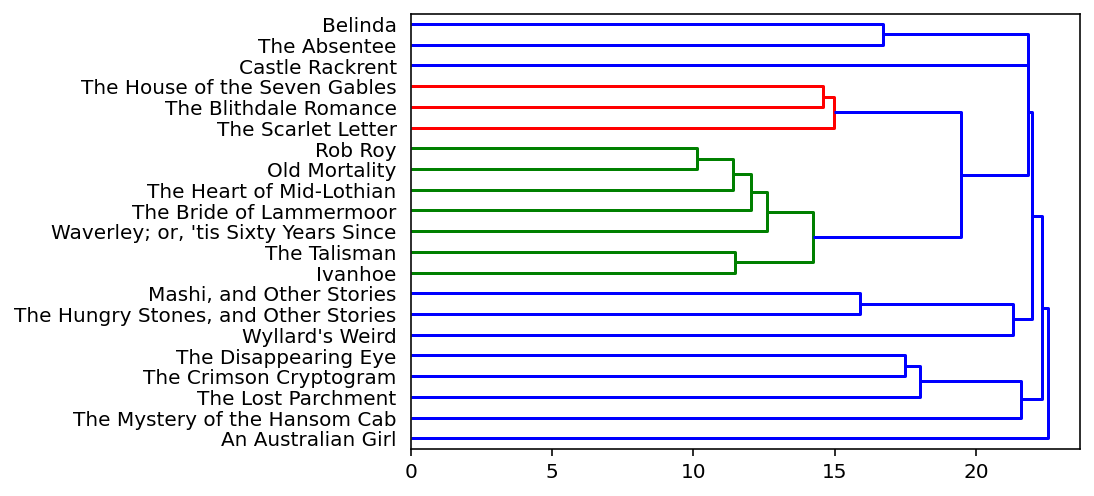

In [39]:
from scipy.cluster import hierarchy
%matplotlib inline
linkage_matrix = hierarchy.linkage(all_distances)
novel_titles = [novel["title"] for novel in corpus]
dendro = hierarchy.dendrogram(linkage_matrix, labels=novel_titles, orientation='right')

# Conclusion

That's it! If you've stuck with *Hacking the Humanities* this far, then well done. Coding demands a new way of thinking, compared to what we are used to in the Humanities.

I hope you enjoyed the course, and feel that you have some extra skills you can take with you into further study, your work, or your life in general. The world is increasingly digital, even the world of culture, and now you have a good understanding of coding, you are equipped to make even better sense of the world.

Goodbye, and good luck!

Michael Falk, University of Kent, 2020